In [1]:
import numpy as np
import pandas as pd
import requests
import json
import datetime

In [2]:
url1 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-07-01&filingDateTo=2019-07-20&limit=100"
url2 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-07-21&filingDateTo=2019-07-31&limit=100"

In [3]:
ptab1 = requests.get(url1).json()
ptab2 = requests.get(url2).json()

In [6]:
ptab_df_1 = pd.DataFrame(ptab1['results'])
ptab_df_2 = pd.DataFrame(ptab2['results'])

In [7]:
ptab_df = pd.concat([ptab_df_1,ptab_df_2])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
ptab_df = ptab_df.loc[:, ptab_df.columns!='links']

In [9]:
def make_clickable(number):
    return '<a href=https://patents.google.com/patent/US{}>{}</a>'.format(number, number)
df = ptab_df.drop(['prosecutionStatus', 'trialName'], axis = 1)
#df.style.format({'patentNumber':make_clickable})

In [10]:
df.reset_index(drop=True).style.format({'patentNumber':make_clickable})

,accordedFilingDate,applicationNumber,filingDate,lastModifiedDatetime,patentNumber,patentOwnerName,petitionerPartyName,trialNumber
0,2019-07-11,15723464,2019-07-11,2019-08-01T13:19:07,9961477,"Wesby, Philip Bernard","Amazon.com, Inc.",IPR2019-01204
1,2019-07-11,15938263,2019-07-11,2019-08-01T13:30:26,10038989,"Wesby, Philip Bernard","Amazon.com, Inc.",IPR2019-01205
2,2019-07-10,10356414,2019-07-10,2019-07-31T20:19:24,7177690,Woods et al,Nevro Corp.,IPR2019-01216
3,2019-07-09,11158961,2019-07-09,2019-07-30T12:05:16,7816631,"Cramer, Gunther",SolarEdge Technologies Ltd.,IPR2019-01223
4,2019-07-09,11158961,2019-07-09,2019-07-30T12:13:50,7816631,"Cramer, Gunther",SolarEdge Technologies Ltd.,IPR2019-01224
5,2019-07-09,11158961,2019-07-09,2019-07-30T12:19:57,7816631,"Cramer, Gunther",SolarEdge Technologies Ltd.,IPR2019-01225
6,nan,11158961,2019-07-09,2019-07-30T12:26:04,7816631,"Cramer, Gunther",SolarEdge Technologies Ltd.,IPR2019-01226
7,nan,11158961,2019-07-09,2019-07-30T12:31:46,7816631,"Cramer, Gunther",SolarEdge Technologies Ltd.,IPR2019-01227
8,2019-07-03,14846943,2019-07-03,2019-07-26T09:52:10,10031897,Shuping et al,Unified Patents Inc.,IPR2019-01265
9,2019-07-10,10036298,2019-07-10,2019-07-25T07:26:05,7092953,"Haynes, Ramond M.",Microsoft Corporation,IPR2019-01268


Text(0, 0.5, 'Count of filings')

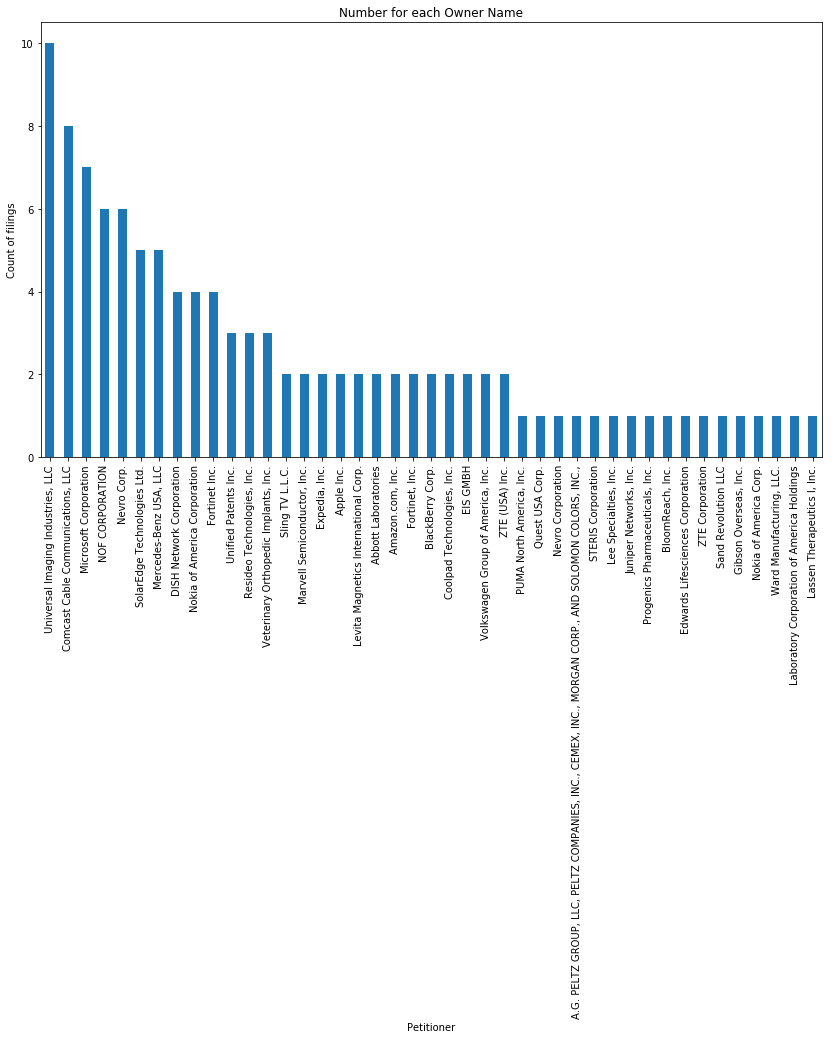

In [11]:
ax = df['petitionerPartyName'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Petitioner")
ax.set_ylabel("Count of filings")